<a href="https://colab.research.google.com/github/Leonardocperes/TemperaturaMediaSP/blob/main/ITERPOALTECLIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Utilização de métodos interpoladores em estações meteorológicas do estado de São Paulo para obtenção de valores da temperatura média em Piracicaba, SP?**
(Autor: Leonardo Costa Peres, 2023)

##**Interpolação espacial**

A interpolação espacial é realizada a partir da conversão de dados de observações pontuais em padrões espaciais, na busca por resultados que representem a realidade onde não houve amostragem.<p>
Neste caso, o método selecionado para a análise foi o de Krigagem Ordinária

##**Método**

###***Bases utilizadas:***

1.   Dados da estação meteorológica de Piracicaba disponével em:<p>
      https://github.com/FlorestaR/dados.git

2.   Dados de 44 estações meteorológica localizadas no São Paulo para os anos de de 2012 a 2022 disponével em:<p>
    https://portal.inmet.gov.br/ <p>
    Ou <p>
    https://github.com/Leonardocperes/TemperaturaMediaSP

---
###***Processamentos:***

1.   Obter a temperatura média para o município de Piracicaba a partir dos dados observados pela estação meteorológica da cidade;

2.   Obeter a temperatura média de estções Meteorológicas do estado de São Paulo entre o período de 2012 à 2022;

3.   Rodar o modelo interpolador (Krigagem) utilizando as temperaturas médias observadas que não sejam de Piracicaba;

4.   Comparar a temperatura média estimada para o município com o valor observado pela estação meteorológica;










##Instalação das bibliotécas:

In [ ]:
!pip install pykrige #Utilizada para rodar o modelo Interpolador

#Utilizada para trabalhar com dados geoespaciais
!pip install --upgrade geopandas 
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.6/852.6 kB 11.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 61.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importação das ferramentas dentro de cada bibliotéca:

In [ ]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np
import pandas as pd
import requests
import io
import os
import urllib.request
import zipfile
from shapely.geometry import Point

##**Importação e visualização dos dados bases da estação meteorológica de Piracicaba**

In [ ]:
# Definição do URL completo para a planilha no github, e inclusão
#     do parâmetro que impõe leitura dos dados brutos (?raw=true)
url_1 = "https://github.com/FlorestaR/dados/blob/main/X_PIRACLIM/"
xls_2 = "DadosClima_Piracicaba.xlsx"
prm_3 = "?raw=true"
gitFile = url_1 + xls_2 + prm_3
print (gitFile)

# Faz o download da planilha
rawFile = requests.get(gitFile).content

# Conversão para um pandas dataframe de uma das abas da planilha
abaData = "ClimaPira"
df = pd.read_excel(rawFile, sheet_name=abaData, header=0)

# Exibe linhas do dataframe
display(df)

https://github.com/FlorestaR/dados/blob/main/X_PIRACLIM/DadosClima_Piracicaba.xlsx?raw=true


,ANO,MES,DIA,TMED,URMED,VentoMED,TMAX,TMAX_hora,URMAX,URMAX_hora,VentoMAX,VentoMAX_hora,TMIN,TMIN_hora,URMIN,URMIN_hora,Chuva,Rad.Glob.,Estiagem
0,1902,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
1,1902,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
2,1902,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
3,1902,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
4,1902,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43947,2023,4,23,20.57,73.754170,1.119,28.11,1401.0,98.8,708.0,6.911,2115.0,13.19,641.0,40.46,1525.0,0.000,19.910,6
43948,2023,4,24,20.99,70.162083,1.307,28.30,1410.0,97.7,718.0,6.831,2025.0,14.58,657.0,37.14,1500.0,0.000,19.550,6
43949,2023,4,25,21.17,73.011563,0.559,28.59,1611.0,98.1,653.0,4.594,46.0,14.00,641.0,42.92,1522.0,0.000,18.280,6
43950,2023,4,26,20.08,91.096250,0.404,23.68,1644.0,98.4,2115.0,4.115,1007.0,18.03,551.0,77.62,14.0,4.572,5.629,0


##Temperatura média em Piracicaba para o ano de 2022

In [ ]:
#Agrupamento dados para as variáveis relacionadas com temperatura obtendo suas médias anuais
medias_variaveis_temperaturas = df.groupby(["ANO"])[["TMED"]].mean()
TMED2022 = subset_medias_variaveis_temperaturas = medias_variaveis_temperaturas.iloc[[120]]
display(subset_medias_variaveis_temperaturas)

,TMED
ANO,
2022,21.604566


##**Importação dos dados de temperatura média das estações meteorológicas do estado de São Paulo**

In [ ]:
# Definição do URL completo para a planilha no github, e inclusão
#     do parâmetro que impõe leitura dos dados brutos (?raw=true)
url_estSP = "https://raw.githubusercontent.com/Leonardocperes/TemperaturaMediaSP/main/"
csv_estSP = "planilhas_Estacoes_complidas.csv"
gitFile_estSP = url_estSP + csv_estSP
print (gitFile_estSP)

# Conversão para um pandas dataframe de uma das abas da planilha
df_estSP = pd.read_csv(gitFile_estSP, sep=";")

# Exibe as linhas do dataframe
display(df_estSP)

https://raw.githubusercontent.com/Leonardocperes/TemperaturaMediaSP/main/planilhas_Estacoes_complidas.csv


,Data,Temperatur,Local,Latitude,Longitude,Y,X,Ano
0,1/31/2013,"24,216935",ARIRANHA,-2113305554,-4884055555,"-21,13305554","-48,84055555",2013
1,2/28/2013,"24,491369",ARIRANHA,-2113305554,-4884055555,"-21,13305554","-48,84055555",2013
2,3/31/2013,"24,125862",ARIRANHA,-2113305554,-4884055555,"-21,13305554","-48,84055555",2013
3,4/30/2013,"21,743333",ARIRANHA,-2113305554,-4884055555,"-21,13305554","-48,84055555",2013
4,5/31/2013,"20,205376",ARIRANHA,-2113305554,-4884055555,"-21,13305554","-48,84055555",2013
...,...,...,...,...,...,...,...,...
4361,5/31/2022,NaN,VOTUPORANGA,-2040333333,-4996611111,"-20,40333333","-49,96611111",2022
4362,6/30/2022,NaN,VOTUPORANGA,-2040333333,-4996611111,"-20,40333333","-49,96611111",2022
4363,7/31/2022,NaN,VOTUPORANGA,-2040333333,-4996611111,"-20,40333333","-49,96611111",2022
4364,8/31/2022,NaN,VOTUPORANGA,-2040333333,-4996611111,"-20,40333333","-49,96611111",2022


##Tratamentos dos dados
Aqui as virgulas foram substituidadas por pontos para que os dados passassem a serem considerados como números decimais <p>
As linhas com valores Nan também foram eliminadas

In [ ]:
df_estSP_NAN = df_estSP.dropna() #Remover os Nan

#Substituir as , para .
df_estSP_NAN['Temperatur'] = df_estSP_NAN['Temperatur'].str.replace(',', '.').astype(float)
df_estSP_NAN['X'] = df_estSP_NAN['X'].str.replace(',', '.').astype(float)
df_estSP_NAN['Y'] = df_estSP_NAN['Y'].str.replace(',', '.').astype(float)

df_estSP_sPIRA = df_estSP_NAN[(df_estSP_NAN['Local'] != " PIRACICABA")] #Remover os dados da estação de Piracicaba do dataFrame
display(df_estSP_sPIRA) #Apresentar os dados

<ipython-input-7-8c1847be4c96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estSP_NAN['Temperatur'] = df_estSP_NAN['Temperatur'].str.replace(',', '.').astype(float)
<ipython-input-7-8c1847be4c96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estSP_NAN['X'] = df_estSP_NAN['X'].str.replace(',', '.').astype(float)
<ipython-input-7-8c1847be4c96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Data,Temperatur,Local,Latitude,Longitude,Y,X,Ano
0,1/31/2013,24.216935,ARIRANHA,-2113305554,-4884055555,-21.133056,-48.840556,2013
1,2/28/2013,24.491369,ARIRANHA,-2113305554,-4884055555,-21.133056,-48.840556,2013
2,3/31/2013,24.125862,ARIRANHA,-2113305554,-4884055555,-21.133056,-48.840556,2013
3,4/30/2013,21.743333,ARIRANHA,-2113305554,-4884055555,-21.133056,-48.840556,2013
4,5/31/2013,20.205376,ARIRANHA,-2113305554,-4884055555,-21.133056,-48.840556,2013
...,...,...,...,...,...,...,...,...
4356,12/31/2021,25.597043,VOTUPORANGA,-2040333333,-4996611111,-20.403333,-49.966111,2021
4357,1/31/2022,25.527285,VOTUPORANGA,-2040333333,-4996611111,-20.403333,-49.966111,2022
4358,2/28/2022,25.684077,VOTUPORANGA,-2040333333,-4996611111,-20.403333,-49.966111,2022
4359,3/31/2022,25.932527,VOTUPORANGA,-2040333333,-4996611111,-20.403333,-49.966111,2022


##Temperatura média em cada estação meteorológica

Aqui foi gerado um dataFrame contendo as coordenadas em graus decimais da localização de cada estação e suas respectivas temperaturas médias

In [ ]:
df_media_estacao = df_estSP_sPIRA.groupby(['Local'])[["Y","X","Temperatur"]].mean()
display (df_media_estacao)

,Y,X,Temperatur
Local,,,
ARIRANHA,-21.133056,-48.840556,22.935233
AVARE,-23.101667,-48.941111,20.601292
BARRA BONITA,-22.471111,-48.557500,22.346671
BARRA DO TURVO,-24.962778,-48.416389,17.915415
BARRETOS,-20.559167,-48.545000,23.038316
BARUERI,-23.523889,-46.869444,19.999660
BAURU,-22.358052,-49.028877,21.957561
BEBEDOURO,-20.948056,-48.471389,24.183067
BERTIOGA,-23.844722,-46.143333,22.537288


##**Importando shapefile dos municípios do estado de São Paulo**

O arquivo shapefile utilizado neste trabalho está localizado em um diretório GitHub aberto




In [ ]:
# Definição do URL completo para a planilha no github, e inclusão
#     do parâmetro que impõe leitura dos dados brutos (?raw=true)
gitOnde = "https://github.com/Leonardocperes/TemperaturaMediaSP/blob/main/Shp_municipiosSP"
gitNome = "municipios_sp.zip"
gitArqv = f"{gitOnde}/{gitNome}?raw=true"
tmpd = "./temp" #pasta temporária que será criada para descompactação dos arquivos zipados

if not os.path.exists(tmpd):
    os.makedirs(tmpd)

zipf = os.path.join(tmpd, "municipios_sp.zip")

if not os.path.exists(zipf):
    urllib.request.urlretrieve(gitArqv, zipf)

with zipfile.ZipFile(zipf, 'r') as zip_ref:
    zip_ref.extractall(tmpd)

#Criando o objeto municipios que contem o shp dos municípios
municipios = gpd.read_file(os.path.join(tmpd, "municipios_sp.shp"))

##Plotando a localização das estações meteorológicas sobre o mapa dos municípios de São Paulo

Neste caso os pontos foram coloridos de acordo com a temperatura média de cada estação

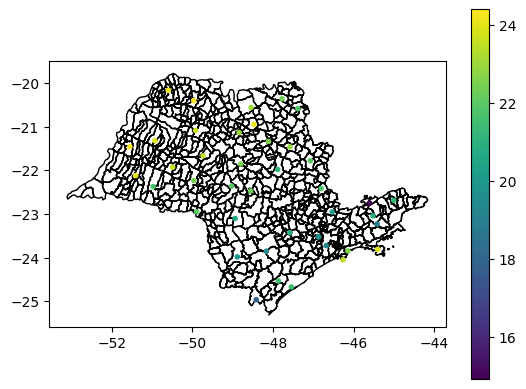

In [ ]:
mapaLocalPontos = municipios.plot(color='none', edgecolor='black')
pontosEst = plt.scatter(df_media_estacao['X'], df_media_estacao['Y'], marker ='.', c=df_media_estacao['Temperatur'])
leg = plt.colorbar(pontosEst) #legenda de barra com as temperaturas médias

##**Realização da Krigagem**

Nesta etapa será realizado a krigagem que estimará as temperaturas médias dentro do estado de São Paulo, trazendo os parâmetros da formula e apresentando o semi-variograma da função 

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 7.11934151026486
Full Sill: 8.28821855316695
Range: 6.514966697165188
Nugget: 1.16887704290209 



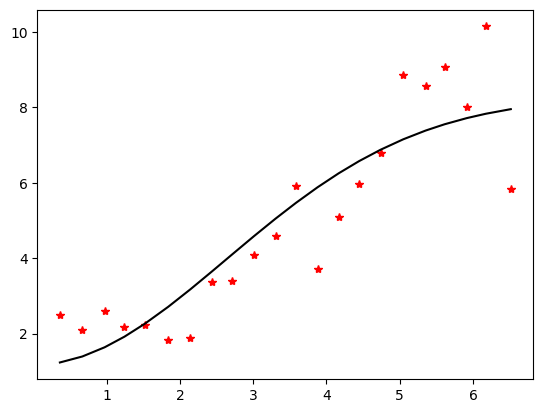

Calculating statistics on variogram model fit...


In [ ]:
OK = OrdinaryKriging(
    df_media_estacao['X'], #eixoX
    df_media_estacao['Y'], #eixoY
    df_media_estacao['Temperatur'], #Qual coluna possui a informação que deseja estimar
    variogram_model='gaussian', #Método
    verbose=True,
    enable_plotting=True,
    nlags=22,
)

In [ ]:
OK.variogram_model_parameters #Confirmando os parâmetros

array([7.11934151, 6.5149667 , 1.16887704])

In [ ]:
gridx = np.arange(-54, -44, 0.1) #largura do eixo X e largura do pixel
gridy = np.arange(-25.5, -19.5, 0.1) #altura do eixo Y e altura do pixel
zstar, ss = OK.execute("grid", gridx, gridy) #Executar a krigagem em gráfico

Executing Ordinary Kriging...



In [ ]:
print(zstar.shape)
print(ss.shape)

(60, 100)
(60, 100)


##Adicionando a camada resultado da krigagem no mapa de localização das estações

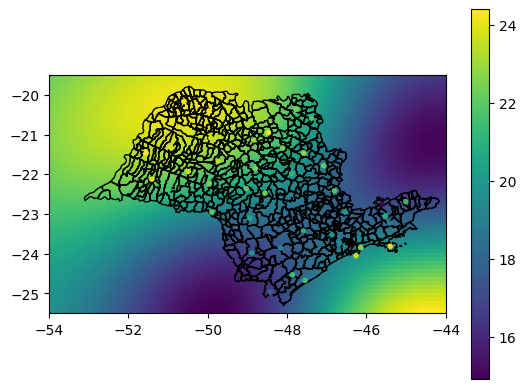

In [ ]:
cax = municipios.plot(edgecolor='black', color = 'none')
plt.imshow(zstar, extent=(-54, -44, -25.5, -19.5), origin='lower') #Camada da Krigagem e dimensionamento
pont = plt.scatter(df_media_estacao['X'], df_media_estacao['Y'], c=df_media_estacao['Temperatur'], marker='.')
cbar=plt.colorbar(pont)

##Obtendo as coordenadas da estação meteorológica de Piracicaba e adicionando ao mapa anterior

In [ ]:
#Gerado com base nos dados do dataFrame das estações meteorológica de SP
df_estSP_PIRA = df_estSP_NAN[(df_estSP_NAN['Local'] == " PIRACICABA")]
df_media_estacaoPira = df_estSP_PIRA.groupby(['Local'])[["Y","X"]].mean()
display (df_media_estacaoPira)


,Y,X
Local,,
PIRACICABA,-22.703056,-47.623333


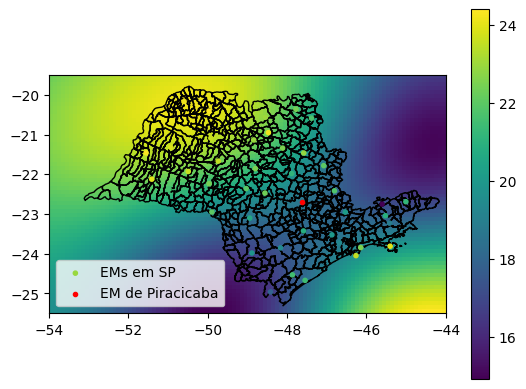

In [ ]:
#Neste mapa também foi adicionada legenda para diferenciar as EM de SP e de Piracicaba
cax1 = municipios.plot(edgecolor='black', color = 'none')
plt.imshow(zstar, extent=(-54, -44, -25.5, -19.5),origin='lower')
pont = plt.scatter(df_media_estacao['X'], df_media_estacao['Y'], c=df_media_estacao['Temperatur'], marker='.', label='EMs em SP')
pontPira = plt.scatter(df_media_estacaoPira['X'], df_media_estacaoPira['Y'], color='red', edgecolor='red', marker='.', label='EM de Piracicaba') #EM de piracicaba
cbar=plt.colorbar(pont)
plt.legend(loc='lower left')

##**Obtendo os valores estimados e observados pela estação meteorológica de Piracicaba**

In [ ]:
#Realizando a krigagem para estimar o valor apenas para o par de coordenadas da EM de Piracicaba 

valorEstimadoPiracicaba = OK.execute("grid", df_media_estacaoPira['X'], df_media_estacaoPira['Y'])[0]

Executing Ordinary Kriging...



In [ ]:
#Obtendo o valor obtido com a krigagem e atribuindo a um objeto
estimadoPiracicaba = valorEstimadoPiracicaba[0][0]
display(estimadoPiracicaba)

20.984491101283293

In [ ]:
#Temperatura  média observado para Piracicaba
medias_variaveis_temperaturas = df[["TMED"]].mean()
observadoPiracicaba = medias_variaveis_temperaturas.TMED
display(observadoPiracicaba)

21.57117718937656

In [ ]:
#Diferência entre as temperaturas observadas e estimadas
diferenca = observadoPiracicaba - estimadoPiracicaba
print("A diferênça entre as temperaturas estimada e observada é de: ",round(diferenca,2),"°C")

A diferênça entre as temperaturas estimada e observada é de:  0.59 °C
